In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


In [2]:
# Load dataset
def load_data():
    data = pd.read_csv('twitter_data.csv')
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,Hashtag,tweet
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...
1,#climatechange,So excited for this! While nuclear plants can be dangerous
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability
4,#climatechange,@AnthonyCole68 well prime minister


In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (720, 2)
Columns are: Index(['Hashtag', 'tweet'], dtype='object')


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
Hashtag    720 non-null object
tweet      720 non-null object
dtypes: object(2)
memory usage: 11.3+ KB


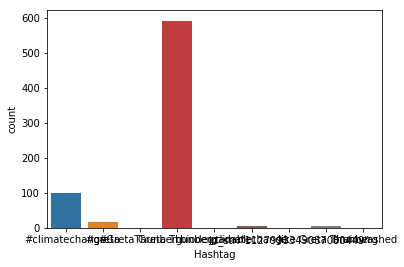

In [6]:
sns.countplot(x = 'Hashtag', data = tweet_df)

In [7]:
df  = pd.DataFrame(tweet_df[['Hashtag', 'tweet']])

(-0.5, 399.5, 199.5, -0.5)

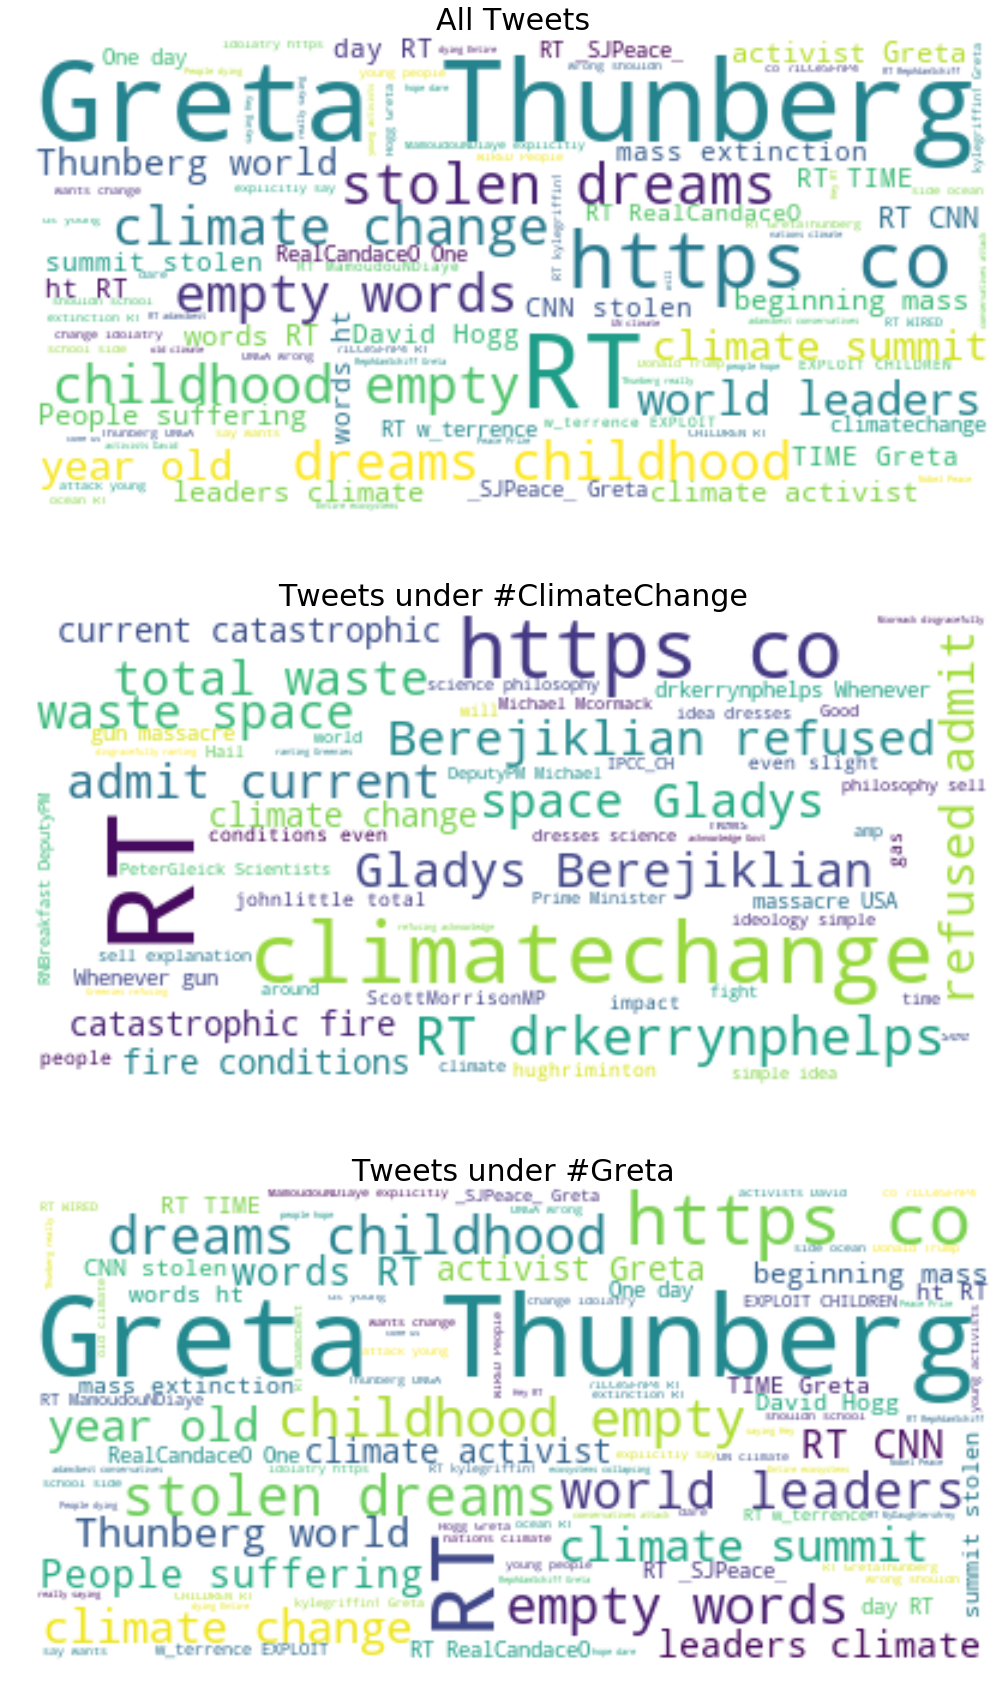

In [25]:
#wordcloud visualisation
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['Hashtag']=='#climatechange']
df_NADR = tweet_df[tweet_df['Hashtag']=='Greta Thunberg']
tweet_All = " ".join(review for review in df.tweet)
tweet_ADR = " ".join(review for review in df_ADR.tweet)
tweet_NADR = " ".join(review for review in df_NADR.tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under #ClimateChange',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under #Greta',fontsize=30)
ax[2].axis('off')

In [11]:
#remove punctuation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,Hashtag,tweet,Tweet_punct
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...,RT susanjssm Just watched abcnews the impressive mayor of Glen Innes on the devastation amp ongo...
1,#climatechange,So excited for this! While nuclear plants can be dangerous,So excited for this While nuclear plants can be dangerous
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...,RT climateguyw Parents please buy this book to begin educating your kids on the history of clima...
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability,RT FintechSIN Singapore Fintech Festival Kicks off Tomorrow With Focus on Sustainability
4,#climatechange,@AnthonyCole68 well prime minister,AnthonyCole well prime minister
5,#climatechange,RT @drkerrynphelps: We will never be able to say we were not warned!,RT drkerrynphelps We will never be able to say we were not warned
6,#climatechange,RT @AgentMacaron: 1/2,RT AgentMacaron
7,#climatechange,RT @humanitarian_bs: So I know it's Sunday and an Holy day.,RT humanitarianbs So I know its Sunday and an Holy day
8,#climatechange,RT @UNDPClimate: ~ 80% of people in Comoros depend on rain-fed agriculture,RT UNDPClimate of people in Comoros depend on rainfed agriculture
9,#climatechange,RT @PeterGleick: Scientists:,RT PeterGleick Scientists


In [13]:
#tokenisation

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()


,Hashtag,tweet,Tweet_punct,Tweet_tokenized
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...,RT susanjssm Just watched abcnews the impressive mayor of Glen Innes on the devastation amp ongo...,"[rt, susanjssm, just, watched, abcnews, the, impressive, mayor, of, glen, innes, on, the, devast..."
1,#climatechange,So excited for this! While nuclear plants can be dangerous,So excited for this While nuclear plants can be dangerous,"[so, excited, for, this, while, nuclear, plants, can, be, dangerous]"
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...,RT climateguyw Parents please buy this book to begin educating your kids on the history of clima...,"[rt, climateguyw, parents, please, buy, this, book, to, begin, educating, your, kids, on, the, h..."
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability,RT FintechSIN Singapore Fintech Festival Kicks off Tomorrow With Focus on Sustainability,"[rt, fintechsin, singapore, fintech, festival, kicks, off, tomorrow, with, focus, on, sustainabi..."
4,#climatechange,@AnthonyCole68 well prime minister,AnthonyCole well prime minister,"[anthonycole, well, prime, minister]"


In [14]:
#remove stopwords

stopword = nltk.corpus.stopwords.words('english')

In [15]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Hashtag,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...,RT susanjssm Just watched abcnews the impressive mayor of Glen Innes on the devastation amp ongo...,"[rt, susanjssm, just, watched, abcnews, the, impressive, mayor, of, glen, innes, on, the, devast...","[rt, susanjssm, watched, abcnews, impressive, mayor, glen, innes, devastation, amp, ongoing, imp..."
1,#climatechange,So excited for this! While nuclear plants can be dangerous,So excited for this While nuclear plants can be dangerous,"[so, excited, for, this, while, nuclear, plants, can, be, dangerous]","[excited, nuclear, plants, dangerous]"
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...,RT climateguyw Parents please buy this book to begin educating your kids on the history of clima...,"[rt, climateguyw, parents, please, buy, this, book, to, begin, educating, your, kids, on, the, h...","[rt, climateguyw, parents, please, buy, book, begin, educating, kids, history, climatechange, we..."
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability,RT FintechSIN Singapore Fintech Festival Kicks off Tomorrow With Focus on Sustainability,"[rt, fintechsin, singapore, fintech, festival, kicks, off, tomorrow, with, focus, on, sustainabi...","[rt, fintechsin, singapore, fintech, festival, kicks, tomorrow, focus, sustainability]"
4,#climatechange,@AnthonyCole68 well prime minister,AnthonyCole well prime minister,"[anthonycole, well, prime, minister]","[anthonycole, well, prime, minister]"
5,#climatechange,RT @drkerrynphelps: We will never be able to say we were not warned!,RT drkerrynphelps We will never be able to say we were not warned,"[rt, drkerrynphelps, we, will, never, be, able, to, say, we, were, not, warned]","[rt, drkerrynphelps, never, able, say, warned]"
6,#climatechange,RT @AgentMacaron: 1/2,RT AgentMacaron,"[rt, agentmacaron, ]","[rt, agentmacaron, ]"
7,#climatechange,RT @humanitarian_bs: So I know it's Sunday and an Holy day.,RT humanitarianbs So I know its Sunday and an Holy day,"[rt, humanitarianbs, so, i, know, its, sunday, and, an, holy, day, ]","[rt, humanitarianbs, know, sunday, holy, day, ]"
8,#climatechange,RT @UNDPClimate: ~ 80% of people in Comoros depend on rain-fed agriculture,RT UNDPClimate of people in Comoros depend on rainfed agriculture,"[rt, undpclimate, of, people, in, comoros, depend, on, rainfed, agriculture]","[rt, undpclimate, people, comoros, depend, rainfed, agriculture]"
9,#climatechange,RT @PeterGleick: Scientists:,RT PeterGleick Scientists,"[rt, petergleick, scientists]","[rt, petergleick, scientists]"


In [16]:
#stemming and lemmatization

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Hashtag,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...,RT susanjssm Just watched abcnews the impressive mayor of Glen Innes on the devastation amp ongo...,"[rt, susanjssm, just, watched, abcnews, the, impressive, mayor, of, glen, innes, on, the, devast...","[rt, susanjssm, watched, abcnews, impressive, mayor, glen, innes, devastation, amp, ongoing, imp...","[rt, susanjssm, watch, abcnew, impress, mayor, glen, inn, devast, amp, ongo, impact, fire, felt,..."
1,#climatechange,So excited for this! While nuclear plants can be dangerous,So excited for this While nuclear plants can be dangerous,"[so, excited, for, this, while, nuclear, plants, can, be, dangerous]","[excited, nuclear, plants, dangerous]","[excit, nuclear, plant, danger]"
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...,RT climateguyw Parents please buy this book to begin educating your kids on the history of clima...,"[rt, climateguyw, parents, please, buy, this, book, to, begin, educating, your, kids, on, the, h...","[rt, climateguyw, parents, please, buy, book, begin, educating, kids, history, climatechange, we...","[rt, climateguyw, parent, pleas, buy, book, begin, educ, kid, histori, climatechang, weather, wo..."
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability,RT FintechSIN Singapore Fintech Festival Kicks off Tomorrow With Focus on Sustainability,"[rt, fintechsin, singapore, fintech, festival, kicks, off, tomorrow, with, focus, on, sustainabi...","[rt, fintechsin, singapore, fintech, festival, kicks, tomorrow, focus, sustainability]","[rt, fintechsin, singapor, fintech, festiv, kick, tomorrow, focu, sustain]"
4,#climatechange,@AnthonyCole68 well prime minister,AnthonyCole well prime minister,"[anthonycole, well, prime, minister]","[anthonycole, well, prime, minister]","[anthonycol, well, prime, minist]"


In [17]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,Hashtag,tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,#climatechange,RT @susanjssm: Just watched @abcnews the impressive mayor of Glen Innes on the devastation &amp;...,RT susanjssm Just watched abcnews the impressive mayor of Glen Innes on the devastation amp ongo...,"[rt, susanjssm, just, watched, abcnews, the, impressive, mayor, of, glen, innes, on, the, devast...","[rt, susanjssm, watched, abcnews, impressive, mayor, glen, innes, devastation, amp, ongoing, imp...","[rt, susanjssm, watch, abcnew, impress, mayor, glen, inn, devast, amp, ongo, impact, fire, felt,...","[rt, susanjssm, watched, abcnews, impressive, mayor, glen, innes, devastation, amp, ongoing, imp..."
1,#climatechange,So excited for this! While nuclear plants can be dangerous,So excited for this While nuclear plants can be dangerous,"[so, excited, for, this, while, nuclear, plants, can, be, dangerous]","[excited, nuclear, plants, dangerous]","[excit, nuclear, plant, danger]","[excited, nuclear, plant, dangerous]"
2,#climatechange,RT @climateguyw: #Parents please buy this book to begin educating your #kids on the #history of ...,RT climateguyw Parents please buy this book to begin educating your kids on the history of clima...,"[rt, climateguyw, parents, please, buy, this, book, to, begin, educating, your, kids, on, the, h...","[rt, climateguyw, parents, please, buy, book, begin, educating, kids, history, climatechange, we...","[rt, climateguyw, parent, pleas, buy, book, begin, educ, kid, histori, climatechang, weather, wo...","[rt, climateguyw, parent, please, buy, book, begin, educating, kid, history, climatechange, weat..."
3,#climatechange,RT @FintechSIN: Singapore Fintech Festival 2019 Kicks off Tomorrow With Focus on Sustainability,RT FintechSIN Singapore Fintech Festival Kicks off Tomorrow With Focus on Sustainability,"[rt, fintechsin, singapore, fintech, festival, kicks, off, tomorrow, with, focus, on, sustainabi...","[rt, fintechsin, singapore, fintech, festival, kicks, tomorrow, focus, sustainability]","[rt, fintechsin, singapor, fintech, festiv, kick, tomorrow, focu, sustain]","[rt, fintechsin, singapore, fintech, festival, kick, tomorrow, focus, sustainability]"
4,#climatechange,@AnthonyCole68 well prime minister,AnthonyCole well prime minister,"[anthonycole, well, prime, minister]","[anthonycole, well, prime, minister]","[anthonycol, well, prime, minist]","[anthonycole, well, prime, minister]"


In [18]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [19]:
#vectorisation

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

720 Number of tweets has 1426 words


In [20]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abc,abcnew,abl,abort,absolut,abus,acceler,acknowledg,act,...,yet,yike,young,youngest,yousafzai,youth,youtub,yungcok,zeal,zero
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#feature creation--Hypothesis
# N0-climatechange has shorter tweets than Greta
# N1-Greta has longer tweets than climatechange
ADR_tweet_1 = tweet_df[tweet_df['Hashtag'] == '#climatechange']['tweet'].apply(lambda x: len(x) - len(' '))
ADR_tweet_0 = tweet_df[tweet_df['Hashtag'] == 'Greta Thunberg']['tweet'].apply(lambda x: len(x) - len(' '))



C:\Users\sumat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\sumat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


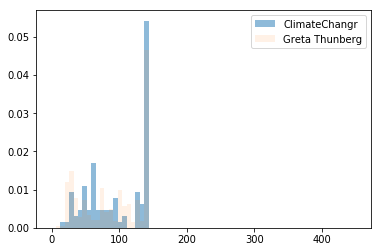

In [22]:
bins_ = np.linspace(0, 450, 70)

plt.hist(ADR_tweet_1, bins= bins_, normed=True, alpha = 0.5, label = 'ClimateChangr')
plt.hist(ADR_tweet_0, bins= bins_, normed=True, alpha = 0.1, label = 'Greta Thunberg')
plt.legend()